In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/bank_marketing.csv")

In [3]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


<function matplotlib.pyplot.show(close=None, block=None)>

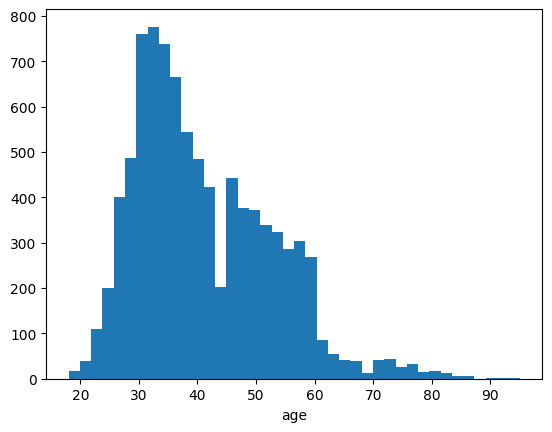

In [6]:
age=np.array(data["age"])
plt.hist(age, bins=40)
plt.xlabel("age")
plt.show

In [7]:
def fun(X):
  return np.log(X+1)

Ajuste a la distribbución con sesgo negativo

<function matplotlib.pyplot.show(close=None, block=None)>

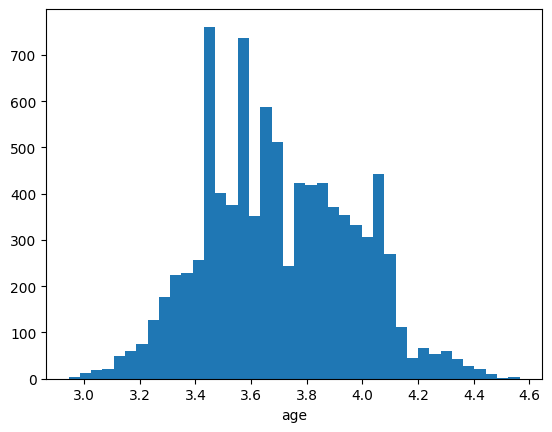

In [8]:
plt.hist(fun(age), bins=40)
plt.xlabel("age")
plt.show

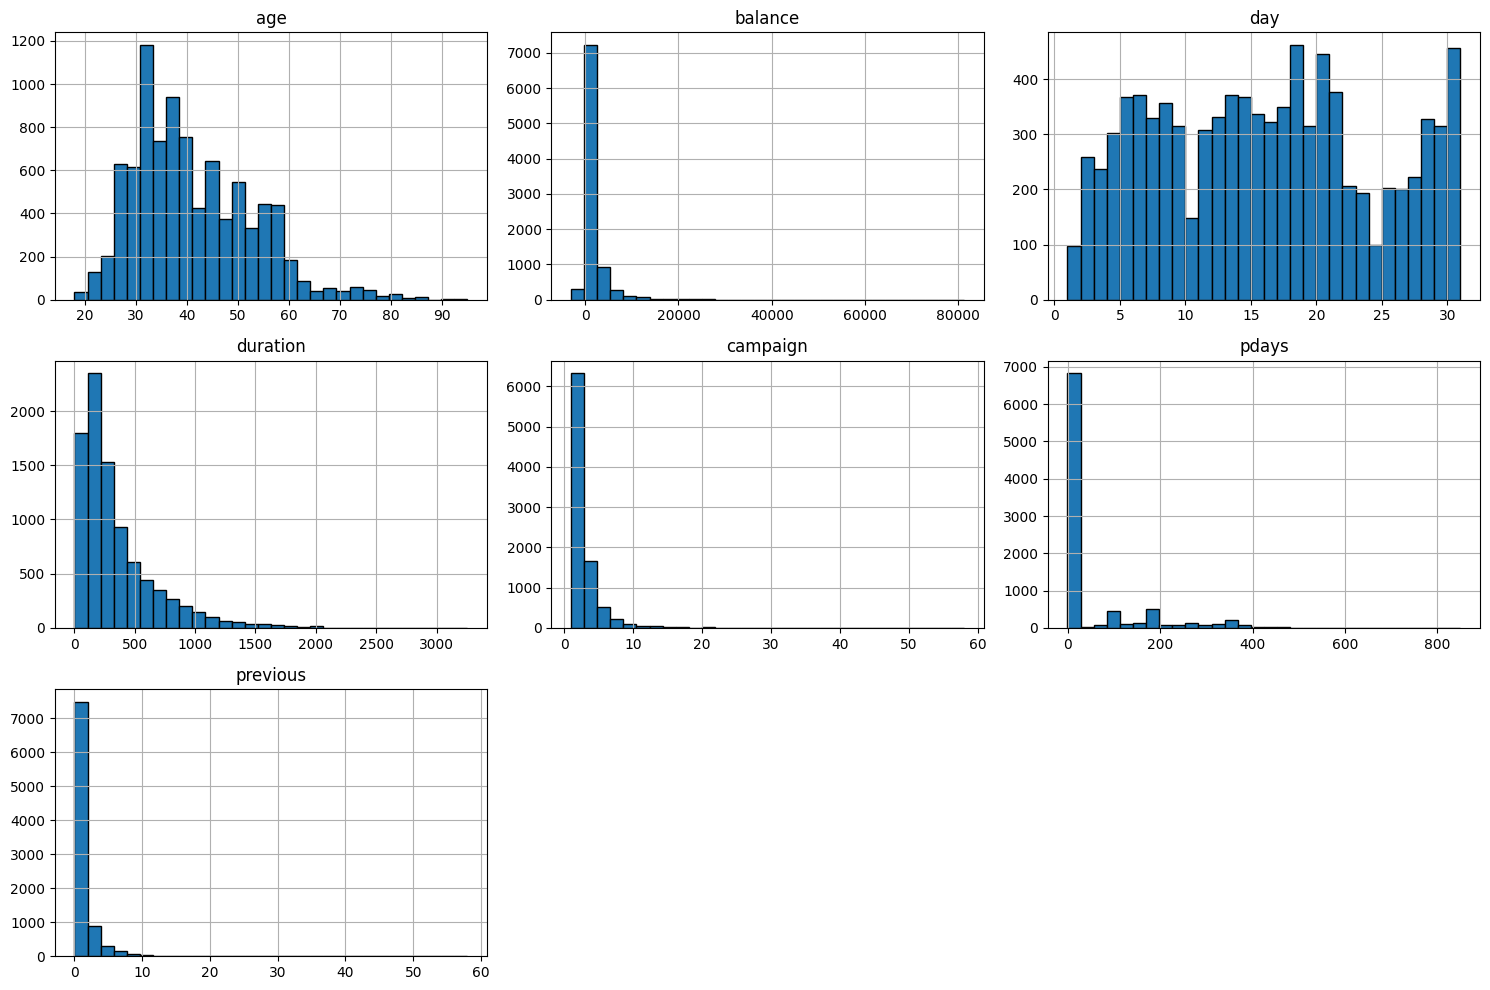

In [9]:
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


Normalizamos para tener los datos en una escala específica

In [10]:
from sklearn.preprocessing import MinMaxScaler


In [11]:
scaler=MinMaxScaler()
var_num=data.select_dtypes(include=["number"]).columns
data[var_num] = scaler.fit_transform(data[var_num])

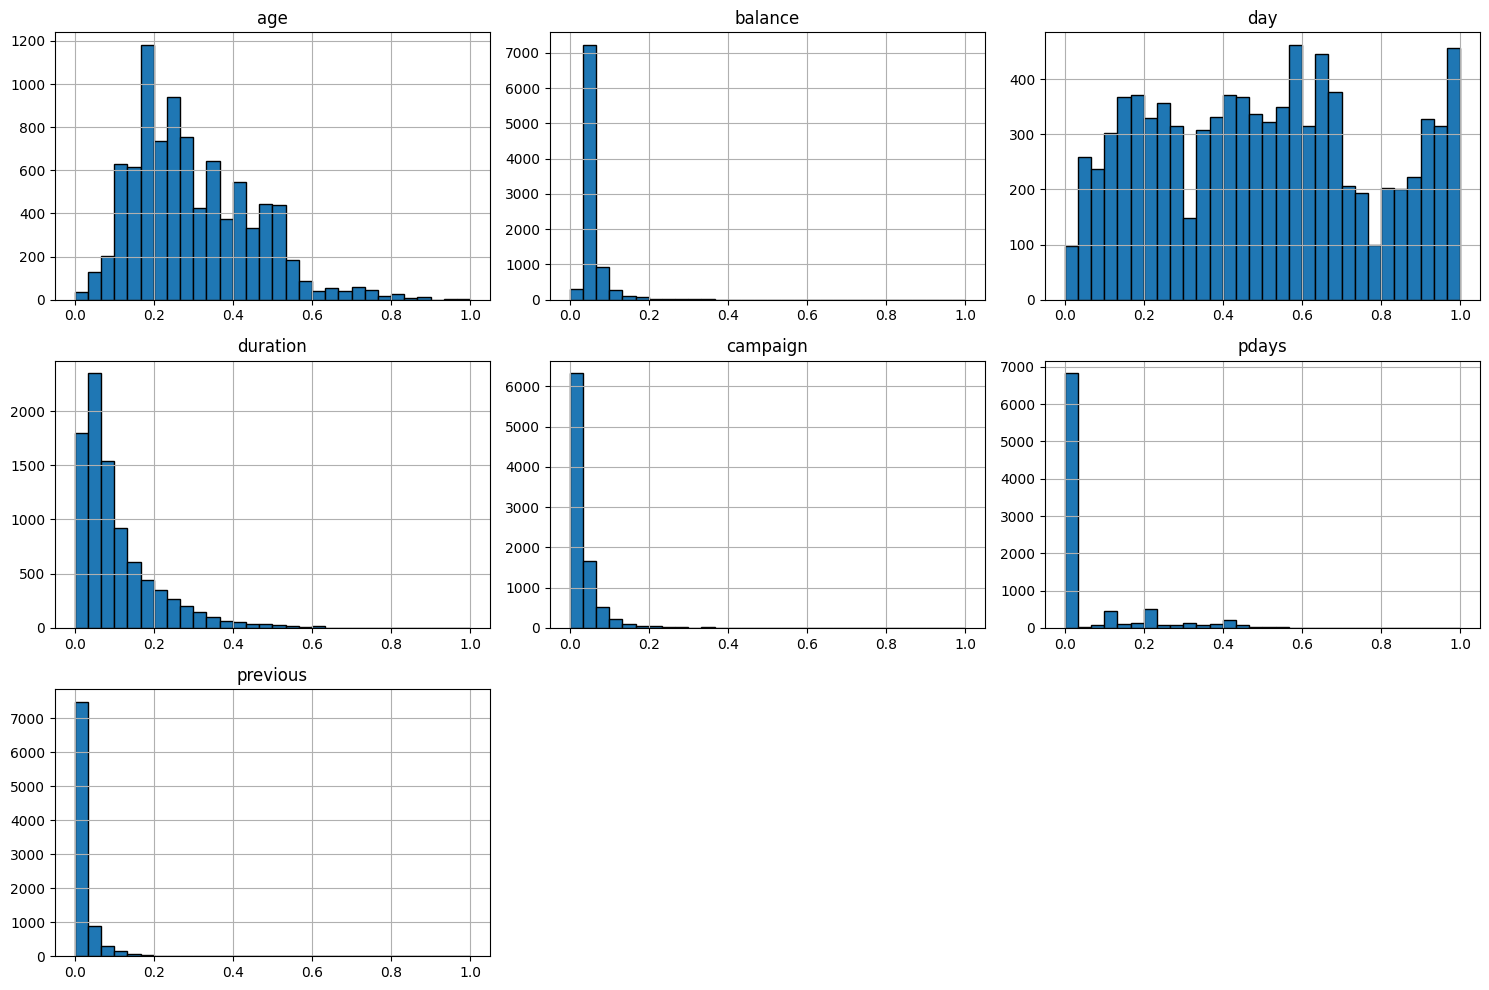

In [12]:
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

Usamos OneHotEncoder ya que las variables son nominales, es decir son categrías sin orden.

In [13]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.168831,self-employed,married,tertiary,no,0.067931,no,no,cellular,0.300000,nov,0.096923,0.017544,0.115159,0.103448,success,yes
1,0.142857,unemployed,single,unknown,no,0.055090,no,no,cellular,0.166667,sep,0.074462,0.000000,0.000000,0.000000,unknown,yes
2,0.298701,blue-collar,married,secondary,no,0.061831,yes,no,cellular,0.533333,nov,0.112615,0.000000,0.000000,0.000000,unknown,no
3,0.415584,blue-collar,married,secondary,no,0.037288,yes,no,cellular,0.533333,jul,0.004615,0.122807,0.000000,0.000000,unknown,no
4,0.285714,admin.,married,secondary,no,0.036292,no,no,cellular,0.900000,jul,0.151692,0.017544,0.215041,0.189655,success,yes


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
varcat=["job","marital","education","default","housing","loan","contact","month",	"poutcome"]

In [16]:

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), varcat)
    ],
    remainder='passthrough'
)

data_encoded_array = encoder.fit_transform(data)


encoded_col_names = encoder.named_transformers_['cat'].get_feature_names_out(varcat)
non_cat_cols = data.drop(columns=varcat).columns
final_column_names = list(encoded_col_names) + list(non_cat_cols)


data_encoded = pd.DataFrame(data_encoded_array, columns=final_column_names)


In [17]:
data_encoded.head(1)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.168831,0.067931,0.3,0.096923,0.017544,0.115159,0.103448,yes


In [18]:
data["y"].value_counts()

,count
y,
no,5213
yes,3787


In [19]:
data_encoded['y'] = data_encoded['y'].map({'yes': 1, 'no': 0})

In [20]:
X=data_encoded[['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'age',
       'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',]]

Y=data_encoded["y"]


In [21]:
Y.head()

,y
0,1
1,1
2,0
3,0
4,1


In [22]:
X=X.apply(pd.to_numeric)

In [23]:
X=X.values
Y=Y.values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_validation_and_test, y_train, y_validation_and_test=train_test_split(X,Y, train_size=.60)
x_validation, x_test, y_validation, y_test=train_test_split(x_validation_and_test,y_validation_and_test, train_size=.50)

In [26]:
print("Dimension X_train_set:\t\t", x_train.shape)
print("Dimension X_validation_set:\t", x_validation.shape)
print("Dimension X_test_set:\t\t", x_test.shape)

print("\n Dimension Y_train_set:\t\t", y_train.shape)
print("Dimension Y_validation_set:\t", y_validation.shape)
print("Dimension Y_test_set:\t\t", y_test.shape)

Dimension X_train_set:		 (5400, 42)
Dimension X_validation_set:	 (1800, 42)
Dimension X_test_set:		 (1800, 42)

 Dimension Y_train_set:		 (5400,)
Dimension Y_validation_set:	 (1800,)
Dimension Y_test_set:		 (1800,)


### Regresión Logistica

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf=LogisticRegression(C=1.0,solver="newton-cg")
modelo_RL=clf.fit(x_train,y_train)

In [29]:
print("regresión logistica: \n Exaxtitud (accuracy) con el conjunto de validación= ", modelo_RL.score(x_validation, y_validation))

regresión logistica: 
 Exaxtitud (accuracy) con el conjunto de validación=  0.8255555555555556


In [30]:
from sklearn.model_selection import GridSearchCV

# mODELO BASE
logreg = LogisticRegression(max_iter=1000)

# Parámetros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de CV:", grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Mejor score de CV: 0.832777777777778


### Con la búsqueda de los hiperparametros encontramos un score de 83.27% para el modelo de regresión logística

In [31]:
print("Exactitud (accuracy) con el conjunto de validación= ",modelo_RL.score(x_validation,y_validation))

Exactitud (accuracy) con el conjunto de validación=  0.8255555555555556


In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

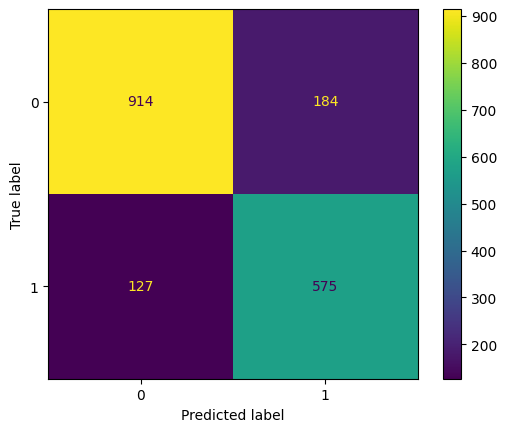

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = grid_search.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()


### Red Neuronal

In [34]:
clf=LogisticRegression(C=1.0,solver="newton-cg")
modelo_RL=clf.fit(x_train,y_train)

In [35]:
print("Red Neuronal: \n Exaxtitud (accuracy) con el conjunto de validación= ", modelo_RL.score(x_validation, y_validation))

Red Neuronal: 
 Exaxtitud (accuracy) con el conjunto de validación=  0.8255555555555556


In [36]:
from sklearn.neural_network import MLPClassifier

model_MLP=MLPClassifier(hidden_layer_sizes=(10),
                    max_iter=1000,
                    alpha=1,
                    random_state=42)

model_MLP.fit(x_train, y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=10, max_iter=1000, random_state=42)

In [37]:
print("Red Neuronal: \n Exaxtitud (accuracy) con el conjunto de validación= ", model_MLP.score(x_validation, y_validation))

Red Neuronal: 
 Exaxtitud (accuracy) con el conjunto de validación=  0.8216666666666667


In [38]:
mlp = MLPClassifier(max_iter=100, random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
# Configurar GridSearch
grid_search_MLP = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

grid_search_MLP.fit(x_train, y_train)

print("Mejores hiperparámetros:", grid_search_MLP.best_params_)
print("Mejor puntuación:", grid_search_MLP.best_score_)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Mejores hiperparámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Mejor puntuación: 0.8385185185185186


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Con la búsqueda de los hiperparametros encontramos un score de 83.85% para el modelo de Red Neuronal

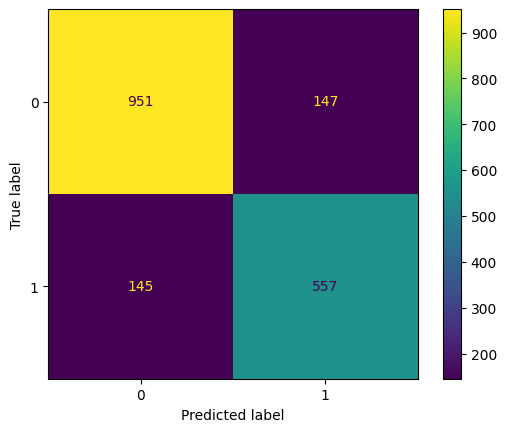

In [40]:
_pred = grid_search_MLP.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()


Al final con el modelo con el que nos quedamos es el modelo de red neuronal con el que obtuvimos mejores métricas con un score de 83.85%


Usar técnicas de Inteligencia artificial en la mercadotecnia es valioso ya que ayuda a tomar mejores decisiones basadas en datos, ayuda a optimizar recursos en incluso personaliza la experiencia de los usuarios. Con ayuda de la IA también se puede predecir comportamientos de los posibles clientes e incluso medir estrategias. Sin embargo, para obtener buenos modelos, hay que saber tratar la información, conocer los tipos de datos con los que estamos tratando, hacer las respectivas transformaciones, probar diferentes modelos, ajustar los hiperparametros para mejorar el modelo, al evaluar los modelos para tener la certeza de que no estamos enfrentándonos a un problema de sobre/sub ajuste.
